<a href="https://colab.research.google.com/github/aeyjeyaryan/Deep-Learning/blob/main/Aritificial%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aritifical Neural Network Algorithm is a Black Box Model. It means we cannot see the internal working becaue its very vast whereas Linear Regression can be considered as white box because its internal working is much easy to see.

In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# dividing the datset into independent and dependent features

X = dataset.iloc[:,3:13]   #rownum, cust.id, surname are not required so we didn't include it. And also not the exited col because its our target
y = dataset.iloc[:,13]

In [22]:
# We have categorical values that is like surname, cr score which are not in numbers so
# data encoding
geography = pd.get_dummies(X['Geography'],drop_first=True)

KeyError: 'Geography'

In [13]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In the output above we can see that in each row where there is name of a particular country its value is 1 and others are 0. That's dummy encoding. We can use OneHotEncoding as well.
One thing to notice is the function of drop_first=True that means we can present values of 3 cols using 2 cols only. So, in the first row if germany and spain are 0 then obvio France is 1. The logic is same in others as well.

In [14]:
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [16]:
# Here, we have the encoded values of country and gender so we will drop the categorical value from the dataset and concatenate these instead
X = X.drop(['Geography','Gender'],axis=1)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [19]:
X = pd.concat([X,geography,gender],axis=1)

In [21]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
#The random_state is a pseudo-random number parameter that allows you
# to reproduce the same train test split each time you run the code

In [24]:
#FEATURE SCALING

from sklearn.preprocessing import StandardScaler   #StandardScaler removes the mean and scales each feature/variable to unit variance.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [28]:
X_train.shape

(8000, 11)

In [44]:
# Creating the ANN


In [39]:
model = tf.keras.Sequential()

In [40]:
# adding the input layer
model.add(tf.keras.layers.Dense(units=12, activation=tf.keras.activations.relu))


In [41]:
#adding first hidden layer
model.add(tf.keras.layers.Dense(units=7,activation='relu'))

In [42]:
#adding second hidden layer
model.add(tf.keras.layers.Dense(units=6,activation= 'relu'))

In [46]:
#adding the output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
# #adam uses a learning rate of 0.1 that is 10%
# # but we can give our own
# import tensorflow
# tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [55]:
#Early Stopping stops the training of the model when the accuracy does not increase

early_stop =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [56]:
model_history = model.fit(X_train,y_train,batch_size=10,epochs=22,validation_data=(X_test,y_test),callbacks=early_stop)

Epoch 1/22
800/800 [==============================] - 3s 4ms/step - loss: 0.3292 - accuracy: 0.8643 - val_loss: 0.3380 - val_accuracy: 0.8590
Epoch 2/22
800/800 [==============================] - 3s 4ms/step - loss: 0.3285 - accuracy: 0.8665 - val_loss: 0.3385 - val_accuracy: 0.8625
Epoch 3/22
800/800 [==============================] - 3s 4ms/step - loss: 0.3279 - accuracy: 0.8660 - val_loss: 0.3393 - val_accuracy: 0.8605
Epoch 4/22
800/800 [==============================] - 4s 5ms/step - loss: 0.3277 - accuracy: 0.8640 - val_loss: 0.3402 - val_accuracy: 0.8595
Epoch 5/22
800/800 [==============================] - 3s 4ms/step - loss: 0.3282 - accuracy: 0.8643 - val_loss: 0.3389 - val_accuracy: 0.8585
Epoch 6/22
800/800 [==============================] - 3s 4ms/step - loss: 0.3267 - accuracy: 0.8666 - val_loss: 0.3402 - val_accuracy: 0.8665
Epoch 7/22
800/800 [==============================] - 4s 4ms/step - loss: 0.3265 - accuracy: 0.8674 - val_loss: 0.3404 - val_accuracy: 0.8615
Epoch 

In [58]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

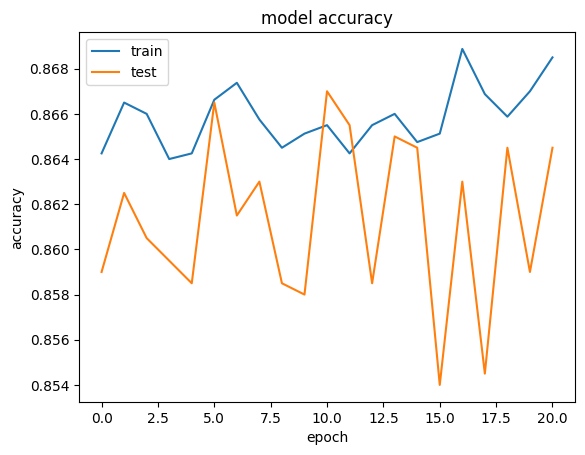

In [59]:
#summarizing the history of accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

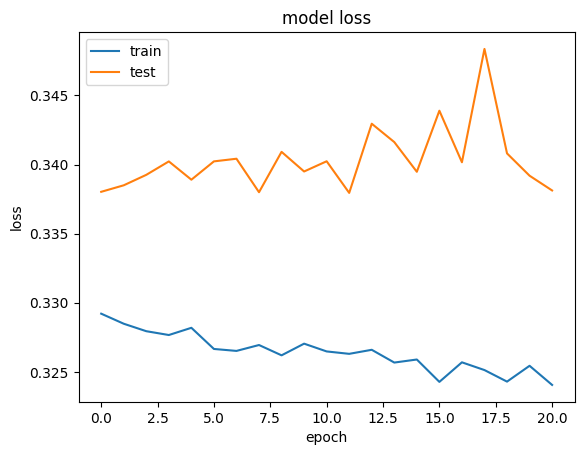

In [60]:
#summarizing the history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [61]:
#making predictions and evaluating the model

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)    #if y pred is greater or equal to .5 we'll take it as 1 or else 0

63/63 [==============================] - 0s 3ms/step


In [65]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [66]:
#calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [67]:
score

0.8645

In [68]:
#get the info about weights
model.get_weights()

[array([[-3.6118254e-02,  6.4097075e-03, -4.1653626e-03, -2.6161569e-01,
         -6.8924569e-02,  9.7233346e-03, -1.1572762e-02, -1.6579227e-01,
          5.3759910e-02,  4.8654053e-02,  1.9777693e-02,  1.1975941e-01],
        [-1.0317121e+00,  1.7772868e-01, -4.5062682e-01,  2.9611889e-01,
         -3.8702171e-02, -9.6169397e-02, -8.0203110e-01,  5.8464158e-01,
         -3.3833489e-02, -4.8365635e-01,  3.9217958e-01, -1.8539131e-01],
        [ 1.1581633e-01, -1.3617641e-01,  1.3086973e-01, -3.1537870e-01,
          1.3957874e-01, -2.4395287e-02,  5.5652101e-02,  3.8218221e-01,
          4.0408319e-01, -4.1583713e-02,  2.5568610e-01, -4.1752312e-01],
        [ 2.0175195e-01,  1.9025148e-01, -1.7485109e-01,  2.0949949e-01,
         -2.9749259e-02, -8.1184554e-01, -6.9983907e-02, -3.5542217e-01,
          1.3109499e-01, -2.1325670e-01, -2.0327331e-01, -6.0637558e-01],
        [-1.1021848e-01, -1.8036194e-01, -5.3761888e-01, -7.8712112e-01,
          6.1411828e-01, -1.2750969e+00, -3.429